# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here

import numpy as np
import pandas as pd
import math

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [2]:
# your answer here

employee = pd.read_csv('Employee.csv')
employee.head(10)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [3]:
# your answer here

print(employee.head(10))

     Name Department Education Gender      Title  Years  Salary
0    Jose         IT  Bachelor      M    analyst      1      35
1   Maria         IT    Master      F    analyst      2      30
2   David         HR    Master      M    analyst      2      30
3   Sonia         HR  Bachelor      F    analyst      4      35
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
6  Carlos         IT    Master      M         VP      8      70
7   Pedro         IT       Phd      M  associate      7      60
8     Ana         HR    Master      F         VP      8      70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [ ]:
# your answer here-1st way
mean_salary = employee.groupby("Department", as_index=False).agg({"Salary":"mean"})
mean_salary

,Department,Salary
0,HR,45.00
1,IT,48.75
2,Sales,55.00


In [ ]:
# your answer here-2nd way
mean_salary2=employee.pivot_table(index=["Department"], values=["Salary"], aggfunc=np.mean)
mean_salary2

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [ ]:
# your answer here


test= employee.pivot_table(employee,columns=['Department','Title'], index=['Salary'])
#test= employee.pivot_table(employee,columns=['Department','Title'], index=['Salary'], aggfunc=np.mean )
#We can use the second or the second one which contains the aggfunc,because anyway at the first one we are getting already the mean

test

Years                                         
Department    HR           IT                       Sales
Title         VP analyst   VP analyst associate associate
Salary                                                   
30           NaN     2.0  NaN     2.0       NaN       NaN
35           NaN     4.0  NaN     1.0       NaN       NaN
55           NaN     NaN  NaN     NaN       NaN       2.5
60           NaN     NaN  NaN     NaN       7.0       NaN
70           8.0     NaN  8.0     NaN       NaN       NaN

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [ ]:
# your answer here

test2 = pd.pivot_table(employee, columns=['Title','Years'], values=['Salary'])
test2

Title   VP analyst         associate        
Years    8       1   2   4         2   3   7
Salary  70      35  30  35        55  55  60

In [ ]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [ ]:
# your answer here

salary_employee = pd.pivot_table(employee, index= ['Department'], values=['Salary','Name'], aggfunc={'Salary':np.mean, 'Name': 'count'})
salary_employee

,Name,Salary
Department,,
HR,3,45.00
IT,4,48.75
Sales,2,55.00


#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [ ]:
# your answer here

dept_sal = pd.pivot_table(employee, values='Salary', index=['Department', 'Title'], aggfunc= [np.mean,np.min,np.max,np.std], fill_value=0)
dept_sal

mean   amin   amax       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

In [ ]:

dept_sal = pd.pivot_table(employee, values='Salary', index=['Department', 'Title'], aggfunc= [np.mean,np.min,np.max,np.std])
dept_sal

mean   amin   amax       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [ ]:
# your answer here

dept_sal = pd.pivot_table(employee, values='Salary', index=['Department', 'Title'], aggfunc= [np.mean,np.min,np.max,np.std], fill_value=0)
dept_sal=dept_sal.fillna(0)
dept_sal

mean   amin   amax       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [ ]:
# your answer here

dept_sal = pd.pivot_table(employee, index= ['Department'], values=['Salary','Name'], aggfunc={'Salary':np.sum, 'Name': 'count'})
dept_sal


,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [ ]:
# your answer here

dept_title = pd.pivot_table(employee, index= ['Department', 'Title'], values=['Years','Salary'], aggfunc={'Salary':np.mean, 'Years': 'count'})
dept_sal

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [ ]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [7]:
# your answer here--Your custom function here



In [ ]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [ ]:
# your answer here

fitbit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LABS/Módulo 2/lab-pivot-table-and-correlation-master/your_code/Fitbit.csv')
fitbit.head(5)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [ ]:
# your answer here

fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [ ]:
# your answer here

fitbit.describe().T

,count,mean,std,min,25%,50%,75%,max
Calorie burned,367.0,2741.501362,916.307036,179.000,2698.000,2974.00,3233.00,4351.00
Steps,367.0,10121.588556,5594.836225,0.000,6730.500,10413.00,13916.50,26444.00
Distance,367.0,8.549128,3.409881,0.000,6.155,8.29,10.56,20.45
Floors,367.0,11.724796,10.337370,0.000,5.000,11.00,16.00,101.00
Minutes Sedentary,367.0,563.934482,294.793145,1.002,520.000,663.00,756.50,998.00
Minutes Lightly Active,367.0,236.405995,86.531376,0.000,179.000,226.00,290.00,472.00
Minutes Fairly Active,367.0,26.163488,20.319456,0.000,8.000,24.00,41.50,101.00
Minutes Very Active,367.0,35.722071,31.006682,0.000,10.500,29.00,54.00,153.00
Activity Calories,367.0,2044.147139,2041.267168,0.000,1218.500,1553.00,1927.50,9830.00
MinutesOfSleep,367.0,290.479564,154.752328,0.000,224.000,337.00,400.50,553.00


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [ ]:
# your answer here

fitbit['Minutes Very Active'].corr(fitbit['Steps'])


0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

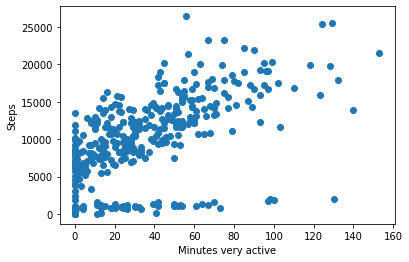

In [ ]:
# your answer here

import matplotlib.pyplot as plt

fitbit['Minutes Very Active'].corr(fitbit['Steps'])


x = fitbit['Minutes Very Active']
y = fitbit['Steps']

plt.xlabel('Minutes very active')
plt.ylabel('Steps')
plt.scatter(x,y)

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your comment here


#Tres comentarios relevantes. Hay un grupo de datos que se ve un comportamiento directamente proporcional
#Por otra parte existe un comportamiento aparentemente constante en casi cero (PROBABLEMENTE SON PROGRAMADORES) 

'\nDos comentarios relevantes. Hay un grupo de datos que se ve un comportamiento directamente proporcional\nPor otra parte existe un comportamiento aparentemente constante en casi cero. \n\n'

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [ ]:
# your answer here

fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

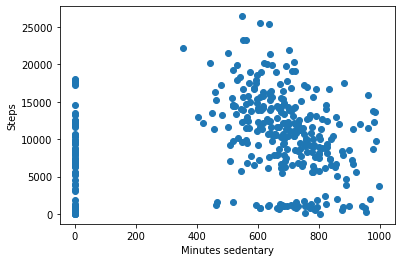

In [ ]:
# your answer hereimport matplotlib.pyplot as plt

fitbit['Minutes Sedentary'].corr(fitbit['Steps'])


x2 = fitbit['Minutes Sedentary']
y2 = fitbit['Steps']

plt.xlabel('Minutes sedentary')
plt.ylabel('Steps')
plt.scatter(x2,y2)

In [ ]:
# Your comment here

#A diferencia de la anterior, en esta se puede ver como y cuanto estan dispersos
#los mismos datos. 

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [ ]:
# your answer here

fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.1309856595083638

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

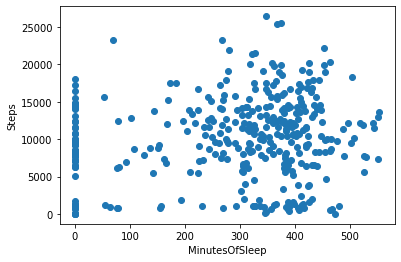

In [ ]:
# your answer here
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])


x3 = fitbit['MinutesOfSleep']
y3 = fitbit['Steps']

plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')
plt.scatter(x3,y3)

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [ ]:
# your answer here

cor_fit=(fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']])
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387
3,2673,6756,8,749.000,4,311
4,2495,502,1,876.000,0,407
...,...,...,...,...,...,...
362,3796,18588,16,599.000,79,377
363,3525,16382,16,684.000,55,406
364,3649,21913,19,701.000,90,280
365,3539,19023,15,575.000,85,370


In [ ]:
#Print cor_fit

cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387
3,2673,6756,8,749.000,4,311
4,2495,502,1,876.000,0,407
...,...,...,...,...,...,...
362,3796,18588,16,599.000,79,377
363,3525,16382,16,684.000,55,406
364,3649,21913,19,701.000,90,280
365,3539,19023,15,575.000,85,370


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [ ]:
# your answer here

cor_fit.corr()

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


In [119]:
cor_fit.Steps.sort_values(ascending=False)

36     26444
357    25571
314    25385
206    23313
335    23286
       ...  
261       39
81        10
229        0
311        0
326        0
Name: Steps, Length: 367, dtype: int64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [122]:
# your answer here

time_grades = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LABS/Módulo 2/lab-pivot-table-and-correlation-master/your_code/Time_Grades.csv')

In [121]:
#Print time_grades
time_grades.head(5)

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the time_grades dataset.

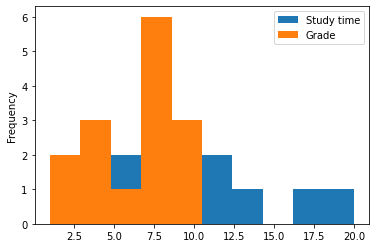

In [131]:
# your answer here

time_grades.plot.hist();

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [129]:
# your answer here-Pearson 

time_grades.corr(method='pearson')


,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [130]:
## your answer here-Spearman

time_grades.corr(method='spearman')


,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

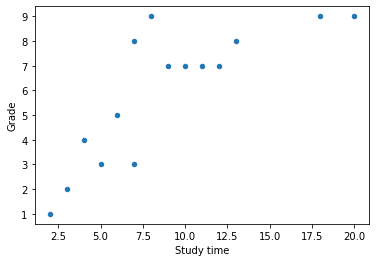

In [132]:
# your answer here

time_grades.plot.scatter(x='Study time', y='Grade')


In [133]:
#your comment here

#It looks like as long as you invest time studying, you get a better grade. But I think there are other facts here that are not cuantified


#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [134]:
#your comment here

#Pearson coefficient works with a linear relationship between the two variables
#Spearman Coefficient works with monotonic relationships.
